## Investigation of Weapon Use

In [1]:
import pandas as pd
import datetime
import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.pyplot import Normalize
%matplotlib inline

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dir = '/Users/JoshLevin/PycharmProjects/data-visualizations/pubg/'

raw = pd.read_csv(filepath_or_buffer=dir+'source/pubg-match-deaths/deaths/kill_match_stats_final_0.csv')

In [11]:
baked = raw[raw['map'] == 'ERANGEL']
baked = baked[['time','killed_by']]



In [34]:
weapon_groups = {
    'AR' : ['SCAR-L', 'M416', 'M16A4', 'AKM', 'Groza', 'AUG', 'QBZ'],
    'LMG' : ['DP-28', 'M249'],
    'SMG' : ['Vector', 'UMP9', 'Tommy Gun', 'Micro UZI'],
    'DMR' : ['VSS', 'SKS', 'Mini 14', 'Mk14'],
    'Sniper' : ['AWM', 'M24', 'Kar98k', 'Win94'],
    'Pistol' : ['R1895', 'R45', 'P1911', 'P92', 'P18C'],
    'Shotgun' : ['S686', 'S1897', 'S12k'],
    'Car' : ['Dacia', 'Buggy', 'Hit by Car', 'Motorbike', 'Motorbike (SideCar)', 'Uaz'],
    'Boat' : ['Boat', 'Aquarail'],
    'Melee' : ['Crossbow', 'Crowbar', 'Machete', 'Punch', 'Pan', 'Sickle'],
    'Enviornment' : ['Bluezone', 'Down and Out', 'Falling', 'Drown'],
}
lookup = {}
for key, val in weapon_groups.items():
    for obj in val:
        lookup[obj] = key

def bucket_func(item):
    if item in lookup:
        return lookup[item]
    else:
        return 'Other'

In [37]:
baked['killed_by'] = baked['killed_by'].apply(bucket_func)

In [39]:
grouped = baked.groupby(['time', 'killed_by'], as_index=False)
df = grouped.agg(np.size)

In [40]:
df = df.unstack()

In [43]:
percent = df.div(df.sum(1)/100,0)

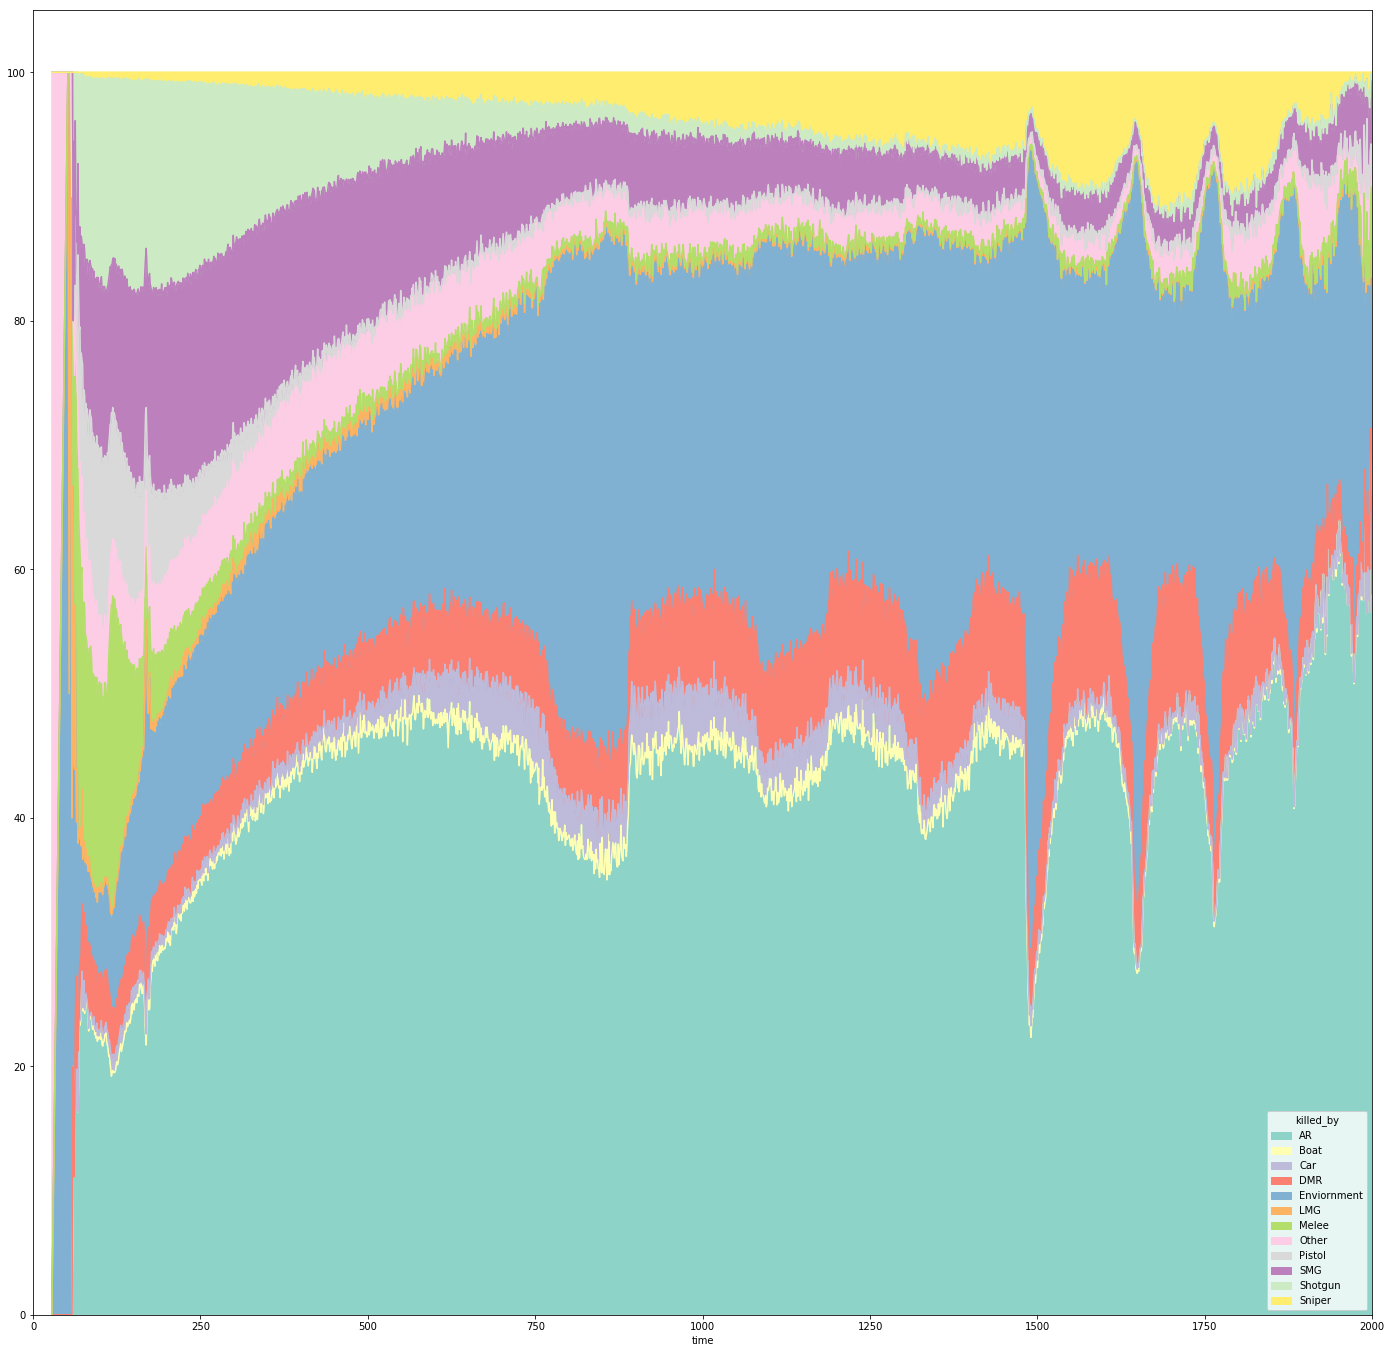

In [47]:
fig, ax = plt.subplots(figsize=(24,24))
ax.set_xlim(0,2000)

percent.plot.area(ax=ax, stacked=True, colormap=cm.Set3)